In [2]:
 import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
df=pd.read_csv("student-por.csv",sep=',')
df.head()
#Dissimilarity Measure For Binary Attribute

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]
dfs.head()
dfs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   schoolsup   649 non-null    object
 1   famsup      649 non-null    object
 2   paid        649 non-null    object
 3   activities  649 non-null    object
 4   nursery     649 non-null    object
 5   higher      649 non-null    object
 6   internet    649 non-null    object
 7   romantic    649 non-null    object
dtypes: object(8)
memory usage: 40.7+ KB


In [11]:
dfs=dfs.replace('no', 0)
dfs=dfs.replace('yes',1)
dfs.head()
#dfs.info()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,0,0,1,1,1,0
3,0,1,0,1,1,1,1,1
4,0,1,0,0,1,1,0,0


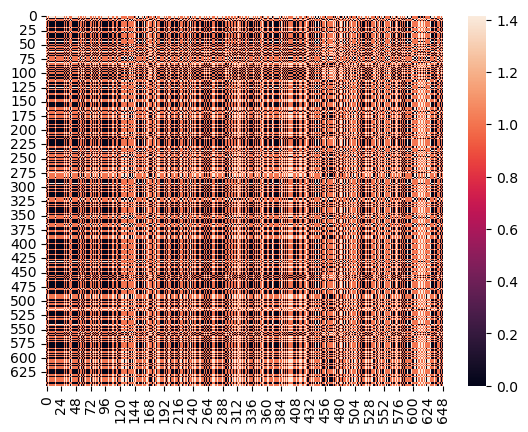

In [12]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape
m=np.array(dfs[['romantic','internet']])
m=m.reshape(-1,2)
m.shape
from scipy.spatial import distance
dist_matrix = distance.cdist(n,m)
dist_matrix.shape
sbs.heatmap(dist_matrix)
plt.show()

In [15]:
#Dissimilarity Measure For NOMINAL Attribute
nominal=df[['Mjob','Fjob','reason','guardian']]
nominal=nominal.replace('at_home','home')
nominal=(nominal.astype('category'))

(649, 649)

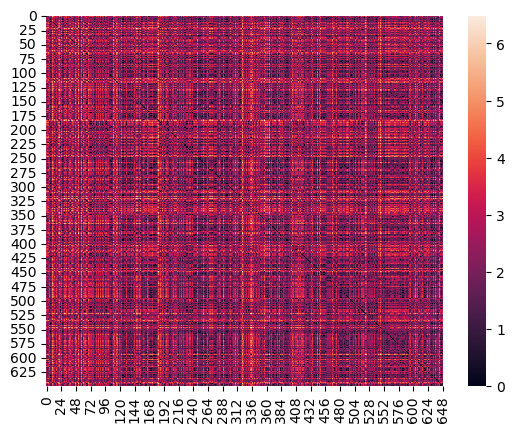

In [17]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['guardian']=lb.fit_transform(nominal['guardian'])
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])
nominal.head()
nom1=np.array(nominal)
nom1.reshape(-1,2)
nom2=np.array(nominal)
nom2.reshape(-1,2)
from scipy.spatial import distance
dist_matrix = distance.cdist(nom1,nom2)
sbs.heatmap(dist_matrix)
dist_matrix.shape

In [18]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['guardian']=lb.fit_transform(nominal['guardian'])
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0
